<a href="https://colab.research.google.com/github/KumarGaurav20/ML-HOMEWORK/blob/main/03_ML_TUT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Tutorial 01
The following table shows the results of a recently conducted study on the correlation of the number of hours spent driving with the risk of developing acute backache. Find the equation of the best fit line for this data.

## Instructions:



1. Find independent variable and dependent variable in given dataset.
2. Implement linear regression in Colab.
3. Find regression line that best predicts value of dependent variable.
4. Find SST, SSE, SSR and co-efficient of determination (R2).
5. Explain pictorial relationship between SST, SSE, SSR.
6. Decide whether regression equation is good fit or not for the given sample data

NOTEBOOK IMPORTS

In [3]:

import pandas as pd
from pandas import DataFrame
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

%matplotlib inline

Constants

In [4]:
X_= 'No of hours driving'
y_= 'Risk Score on a Scale of 0-100'

## 1.READING DATA

In [5]:
data = pd.read_csv('/content/ML_TUT1.csv')
data

,X,y
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45
5,16,98
6,11,38
7,16,93


In [6]:
data.describe()

,X,y
count,8.000000,8.000000
mean,11.125000,63.625000
std,4.673252,32.429869
min,2.000000,10.000000
25%,9.750000,43.250000
50%,10.500000,65.000000
75%,15.250000,93.500000
max,16.000000,98.000000


Determining which one is the dependent variable
From the above dataset it is very well evident that 'y' is the dependent variable, since it is a score of how severe the pain can turn out to be after driving 'x' number of hours, therefore, it is safe to say that 'y' is dependent on 'x' and exhibits a linear relationship.

## 2.Implementing Linear Relation

In [7]:
# Converting the columns into individual dataframes
X = DataFrame(data, columns = ['X'])
y = DataFrame(data, columns = ['y'])

In [8]:
X

,X
0,10
1,9
2,2
3,15
4,10
5,16
6,11
7,16


In [9]:
y

,y
0,95
1,80
2,10
3,50
4,45
5,98
6,38
7,93


VISUALIZATION

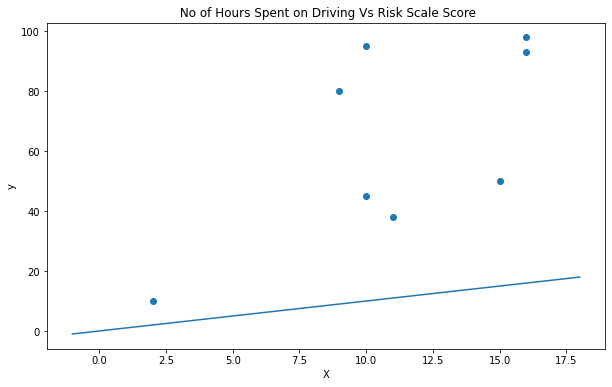

In [10]:
plt.figure(figsize=(10, 6))
line= np.linspace(-1,18, 100)
plt.title(' No of Hours Spent on Driving Vs Risk Scale Score')
plt.plot(line, line)
plt.scatter(X, y) 
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [11]:
regr = LinearRegression()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [13]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(f'The regression coefecient is:{regr.coef_}')

The regression coefecient is:[[4.11803279]]


In [15]:
print(f'The regression intercept is:{regr.intercept_}')

The regression intercept is:[14.4852459]


### 3.THE BEST LINE(REGR LINE)

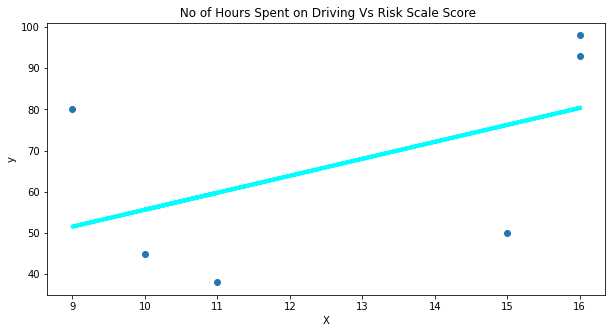

In [16]:
plt.figure(figsize=(10, 5))
plt.title(' No of Hours Spent on Driving Vs Risk Scale Score')
plt.scatter(X_train, y_train)
plt.plot(X_train,regr.predict(X_train), color='aqua', linewidth=4)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

##5. FINDIND SST, SSE, SSR and R2

In [17]:
y_train

,y
5,98
4,45
6,38
1,80
3,50
7,93


In [18]:
mean = int(y.mean())
y_list = np.reshape(y_train.to_numpy(), 6)

sumSST = ((y_list - mean)**2).sum()

print('The SST (Sum of Squares Total) for the above linear regession model is:', sumSST)

The SST (Sum of Squares Total) for the above linear regession model is: 3532


In [19]:
mean = int(y.mean())

predicted = regr.predict(X_test)
predicted_reshaped = np.reshape(predicted, 2)

sumSSR = int(((predicted_reshaped - mean)**2).sum())

print('The SSR (Sum of Squares due to Regression) for the above linear regession model is:', sumSSR)

The SSR (Sum of Squares due to Regression) for the above linear regession model is: 1676


In [20]:
print('The SSR (Sum of Squares Error) for the above linear regession model is:', sumSST - sumSSR)

The SSR (Sum of Squares Error) for the above linear regession model is: 1856


In [21]:
r2 = 1 - (sumSSR/sumSST)
print('The r^2 value for the above linear regression model calculated through the formula is:', r2)
print('The r^2 value for the above linear regression model calculated through LinearRegression is:', metrics.r2_score(y_test, predicted_reshaped))

The r^2 value for the above linear regression model calculated through the formula is: 0.5254813137032843
The r^2 value for the above linear regression model calculated through LinearRegression is: 0.5269124283850473


##EVALUATIION

In [22]:
regr.score(X, y)

0.42048450214956035

In [25]:
print('The r2 score for the complete model turns out to be ~0.42, therefore, according to Falk and Miller the model score should be more than or equal to 0.10 for a successful model, thus, accordin to these researchers in 1902 our model is successful.If we were to consider Chin in 1998 who recommended that an r2 score of 0.33 or less renders a model moderate, then our model is rendered to be moderate in it\'s results.')

The r2 score for the complete model turns out to be ~0.42, therefore, according to Falk and Miller the model score should be more than or equal to 0.10 for a successful model, thus, accordin to these researchers in 1902 our model is successful.If we were to consider Chin in 1998 who recommended that an r2 score of 0.33 or less renders a model moderate, then our model is rendered to be moderate in it's results.
